# Identify Human Activities using Machine Learnining Algorithms
 


Vibration, Siting, Drop_n_pi, Standing, Walking and Stationaries are the 6 activities which were performed in this project.
And the sensors dataset which we would use were  gathered by differents sensors machine. 


Our goal in this project is to Model this activities using the Machine Learning Algorithms to identify various activities that was performed by different individuals. 




# Importing the Libraries and Parkages

Let's begin this project by importing some essential libraries that would help us as we are moving on in the project.  
  I imported numpy and pandas for the  arrays and the  dataset and represent them with Aliases np and pd respectively. Also, for the best dataset visaulization, matplotlib was imported as plt.  
 
 
 
 
For the various machine learning algorithms, I imported SVM, Logistic Regression, K Nearest Neighbors Classifier and Random Forest Classifier from sklearn. Also, included is accuracy_score to calculate accuracy.
 
Lastly %matplotlib inline help all our graph to be included in the Notebook.







In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix



from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color mapfier


from sklearn.metrics import accuracy_score

# importing the Dataset into the Notebook
 Here, I used pandas package to read the csv files into the jupyther Notebook 


In [2]:
#Read the data in
data= pd.read_csv('C:\\Users\\ajibo\\Desktop\\SENSORS ACTIVITY\\Sensor_Activities.csv')



In [3]:
data #Calling the Dataset

,Acceleration_Timestamp,Acc_X,Acc_Y,Acc_Z,AngVelocity_Timestamp,AngV_X,AngV_Y,AngV_Z,MagField_Timestamp,Mag_X,Mag_Y,Mag_Z,Orientation_Timestamp,Orin_X,Orin_Y,Orin_Z,Activity,Value
0,05:56.4,-0.131576,-0.086370,9.398655,05:56.4,-0.008043,0.006485,-0.013777,05:56.4,21.740547,-3.269182,-26.693754,05:56.4,-77.395704,-0.891910,1.271720,Vibration,1
1,05:56.4,-0.122146,0.239352,9.314530,05:56.4,-0.006196,-0.003392,-0.014942,05:56.4,17.138367,-10.707533,-22.636873,05:56.4,-77.394480,-0.890001,1.269079,Vibration,1
2,05:56.4,0.095950,0.429307,9.773775,05:56.4,0.002659,0.011626,-0.012663,05:56.4,17.138367,-10.707533,-22.636873,05:56.4,-77.393229,-0.891062,1.267604,Vibration,1
3,05:56.4,-0.278271,0.395927,10.230476,05:56.4,-0.000111,0.012432,-0.011048,05:56.4,15.912338,-12.276485,-21.495737,05:56.4,-77.392690,-0.894940,1.271933,Vibration,1
4,05:56.4,-0.530796,0.440384,9.580527,05:56.4,-0.007276,-0.002988,-0.009649,05:56.4,15.912338,-12.276485,-21.495737,05:56.4,-77.393355,-0.894859,1.271206,Vibration,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148772,38:07.4,-0.276625,-0.134570,9.725426,38:07.4,-0.001056,0.007730,-0.010401,38:07.4,-7.531019,-24.382149,-2.157328,38:07.4,-165.392838,0.773229,1.796954,Stationary_on_Table,6
148773,38:07.4,-0.278870,-0.136217,9.752070,38:07.4,-0.003360,0.007491,-0.012005,38:07.4,-7.531019,-24.382149,-2.157328,38:07.4,-165.393032,0.772983,1.797001,Stationary_on_Table,6
148774,38:07.4,-0.287552,-0.128732,9.720336,38:07.4,0.000150,0.009903,-0.010443,38:07.4,-7.409260,-24.093658,-2.192459,38:07.4,-165.393382,0.771928,1.797951,Stationary_on_Table,6
148775,38:07.4,-0.301174,-0.132774,9.716445,38:07.4,-0.000667,0.006524,-0.011844,38:07.4,-7.409260,-24.093658,-2.192459,38:07.4,-165.393635,0.769840,1.799067,Stationary_on_Table,6


# Finding the missing Datas  and cleaning of the Dataset

Now, we want to clean my dataset inorder for the data to be best fits for the viasualization and the analysis.

Note- A missing column in the dataset could cause the final results not to be accurate.



In [4]:
data= data.drop(columns= ['Acceleration_Timestamp', 'AngVelocity_Timestamp', 'MagField_Timestamp', 'Orientation_Timestamp'])

In [5]:
data_Clean= data.isnull() # Cleaning with isnull key and also assigning a new variable "data_Clean" to the dataset


In [6]:
data_Clean.isnull().any() #isnull.any() can also be use to check the missing data in the dataset


Acc_X       False
Acc_Y       False
Acc_Z       False
AngV_X      False
AngV_Y      False
AngV_Z      False
Mag_X       False
Mag_Y       False
Mag_Z       False
Orin_X      False
Orin_Y      False
Orin_Z      False
Activity    False
Value       False
dtype: bool

Since there is no missing data in the dataset, then, we can proceed to exploring our dataset.


# Exploratry of the Dataset using Pandas parkages as np

We begin this part by counting the number of rows and the columns we have in the above dataset called "data".  We  also checked the head and the bottom. Lastly, we checked the data descrition and the informations.


In [7]:
#Checking the first 5 rows of the data
data.head()


,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Value
0,-0.131576,-0.086370,9.398655,-0.008043,0.006485,-0.013777,21.740547,-3.269182,-26.693754,-77.395704,-0.891910,1.271720,Vibration,1
1,-0.122146,0.239352,9.314530,-0.006196,-0.003392,-0.014942,17.138367,-10.707533,-22.636873,-77.394480,-0.890001,1.269079,Vibration,1
2,0.095950,0.429307,9.773775,0.002659,0.011626,-0.012663,17.138367,-10.707533,-22.636873,-77.393229,-0.891062,1.267604,Vibration,1
3,-0.278271,0.395927,10.230476,-0.000111,0.012432,-0.011048,15.912338,-12.276485,-21.495737,-77.392690,-0.894940,1.271933,Vibration,1
4,-0.530796,0.440384,9.580527,-0.007276,-0.002988,-0.009649,15.912338,-12.276485,-21.495737,-77.393355,-0.894859,1.271206,Vibration,1


In [8]:
#Checking the last 5 rows of the data
data.tail()


,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Value
148772,-0.276625,-0.134570,9.725426,-0.001056,0.007730,-0.010401,-7.531019,-24.382149,-2.157328,-165.392838,0.773229,1.796954,Stationary_on_Table,6
148773,-0.278870,-0.136217,9.752070,-0.003360,0.007491,-0.012005,-7.531019,-24.382149,-2.157328,-165.393032,0.772983,1.797001,Stationary_on_Table,6
148774,-0.287552,-0.128732,9.720336,0.000150,0.009903,-0.010443,-7.409260,-24.093658,-2.192459,-165.393382,0.771928,1.797951,Stationary_on_Table,6
148775,-0.301174,-0.132774,9.716445,-0.000667,0.006524,-0.011844,-7.409260,-24.093658,-2.192459,-165.393635,0.769840,1.799067,Stationary_on_Table,6
148776,-0.292043,-0.127385,9.748777,-0.004020,0.006514,-0.012248,-7.480761,-24.162157,-2.131147,-165.393280,0.769205,1.799280,Stationary_on_Table,6


In [9]:
#Checking the info of the Dataset
data.info()

# Our info contains shows 148777 entries for the rows and 14 columns of dataset. 
# Another thing we can talk about here is the  datatypes namely( float , object and the integers)
# Floats are numbers with decimal
#object are string i.e Datas writing with alphabeths
# integers are whole numbers 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148777 entries, 0 to 148776
Data columns (total 14 columns):
Acc_X       148777 non-null float64
Acc_Y       148777 non-null float64
Acc_Z       148777 non-null float64
AngV_X      148777 non-null float64
AngV_Y      148777 non-null float64
AngV_Z      148777 non-null float64
Mag_X       148777 non-null float64
Mag_Y       148777 non-null float64
Mag_Z       148777 non-null float64
Orin_X      148777 non-null float64
Orin_Y      148777 non-null float64
Orin_Z      148777 non-null float64
Activity    148777 non-null object
Value       148777 non-null int64
dtypes: float64(12), int64(1), object(1)
memory usage: 15.9+ MB


In [10]:
data.describe()

# The data descrition shows the average(mean) , media(50%),the deviation from the average value(std),  
#minimum, maximum,  value of each columns in the dataset

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Value
count,148777.000000,148777.000000,148777.000000,148777.000000,148777.000000,148777.000000,148777.000000,148777.000000,148777.000000,148777.000000,148777.000000,148777.000000,148777.000000
mean,0.042009,0.690173,8.206234,-0.008265,-0.008222,-0.016497,0.819196,-3.149676,-11.792196,-23.753169,-4.091652,0.631398,3.510213
std,3.509431,3.279668,4.068368,0.635436,0.546504,0.384060,20.604543,21.897197,29.029023,91.422335,18.016868,28.369960,1.703756
min,-78.048747,-79.246556,-78.457696,-27.866642,-29.462856,-5.539914,-65.648956,-50.470551,-57.887184,-179.994462,-75.465683,-178.096297,1.000000
25%,-0.337249,-0.135169,7.474257,-0.011151,-0.001890,-0.015818,-7.297462,-18.160877,-36.757881,-78.556227,-12.904148,0.255187,2.000000
50%,-0.238903,0.342787,9.439371,-0.003075,0.006759,-0.011675,-2.333099,-6.414314,-15.417244,1.481737,-0.941799,1.321009,4.000000
75%,-0.017514,2.243385,9.737102,0.005375,0.016292,-0.008559,10.110970,3.529068,16.315924,47.742732,0.809575,1.890097,5.000000
max,78.507992,71.864657,77.830351,22.718901,28.451576,4.119627,92.607330,103.986122,58.252304,179.997043,76.819692,179.342925,6.000000


## Visuliasing the dataset with pie chart and Heatmap.

Let's check for the percentage of the activities that was done by visualizing it in pie chart. And also, let's check for the first activities "vibration" to know how the three sensors figure correlated to each others at everyminute when the datas was collected.

In [11]:
#Call for the dataset again

data

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity,Value
0,-0.131576,-0.086370,9.398655,-0.008043,0.006485,-0.013777,21.740547,-3.269182,-26.693754,-77.395704,-0.891910,1.271720,Vibration,1
1,-0.122146,0.239352,9.314530,-0.006196,-0.003392,-0.014942,17.138367,-10.707533,-22.636873,-77.394480,-0.890001,1.269079,Vibration,1
2,0.095950,0.429307,9.773775,0.002659,0.011626,-0.012663,17.138367,-10.707533,-22.636873,-77.393229,-0.891062,1.267604,Vibration,1
3,-0.278271,0.395927,10.230476,-0.000111,0.012432,-0.011048,15.912338,-12.276485,-21.495737,-77.392690,-0.894940,1.271933,Vibration,1
4,-0.530796,0.440384,9.580527,-0.007276,-0.002988,-0.009649,15.912338,-12.276485,-21.495737,-77.393355,-0.894859,1.271206,Vibration,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148772,-0.276625,-0.134570,9.725426,-0.001056,0.007730,-0.010401,-7.531019,-24.382149,-2.157328,-165.392838,0.773229,1.796954,Stationary_on_Table,6
148773,-0.278870,-0.136217,9.752070,-0.003360,0.007491,-0.012005,-7.531019,-24.382149,-2.157328,-165.393032,0.772983,1.797001,Stationary_on_Table,6
148774,-0.287552,-0.128732,9.720336,0.000150,0.009903,-0.010443,-7.409260,-24.093658,-2.192459,-165.393382,0.771928,1.797951,Stationary_on_Table,6
148775,-0.301174,-0.132774,9.716445,-0.000667,0.006524,-0.011844,-7.409260,-24.093658,-2.192459,-165.393635,0.769840,1.799067,Stationary_on_Table,6


In [12]:
# For the pie chart, we can drop the value colum in the above dataset'
#We  make a new  variable for the dataset. We called it data2.

data2= data.drop('Value', axis=1)


In [13]:
# Calling out the activity column from the dataset
Activity= data2['Activity']


In [14]:
# =dataype of the activity. 
# Activity is a series not a dataframe because it's just a column of the dataset
type(Activity)

pandas.core.series.Series

In [15]:
count_of_each_activity = np.array(Activity.value_counts())
activities = sorted(Activity.unique())
category_names= ['activities']

In [16]:
count_of_each_activity

array([25267, 25214, 24613, 24563, 24562, 24558], dtype=int64)

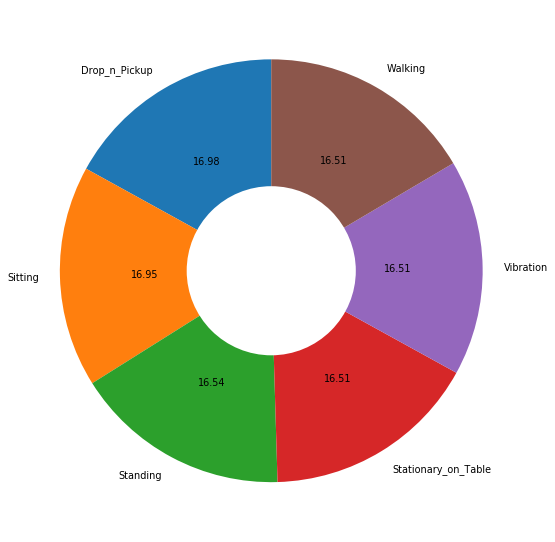

In [17]:
# Plot a pie chart for all activities
plt.figure(figsize=(15, 10), dpi=70)
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f',startangle=90  )
# draw the circle inside the pie chart.
centre_circle = plt.Circle((0, 0), radius=0.4, fc='white')
plt.gca().add_artist(centre_circle)
plt.show()




# Heatmap plot

In [18]:
# Dataset for acc_X, Acc_Y, 'Acc_Z' with the values of the activities column
Dist= data[['Acc_X', 'Acc_Y', 'Acc_Z', 'Value']]


In [19]:
Dist

,Acc_X,Acc_Y,Acc_Z,Value
0,-0.131576,-0.086370,9.398655,1
1,-0.122146,0.239352,9.314530,1
2,0.095950,0.429307,9.773775,1
3,-0.278271,0.395927,10.230476,1
4,-0.530796,0.440384,9.580527,1
...,...,...,...,...
148772,-0.276625,-0.134570,9.725426,6
148773,-0.278870,-0.136217,9.752070,6
148774,-0.287552,-0.128732,9.720336,6
148775,-0.301174,-0.132774,9.716445,6


In [20]:
Vibration= Dist[Dist['Value']==1] #.value_counts= 'Vibration'

In [21]:
 Vibration

,Acc_X,Acc_Y,Acc_Z,Value
0,-0.131576,-0.086370,9.398655,1
1,-0.122146,0.239352,9.314530,1
2,0.095950,0.429307,9.773775,1
3,-0.278271,0.395927,10.230476,1
4,-0.530796,0.440384,9.580527,1
...,...,...,...,...
24553,-0.248483,-0.053888,9.783804,1
24554,-0.403561,0.012125,10.066716,1
24555,-0.267344,0.223635,10.150692,1
24556,-0.045805,0.127086,9.955497,1


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

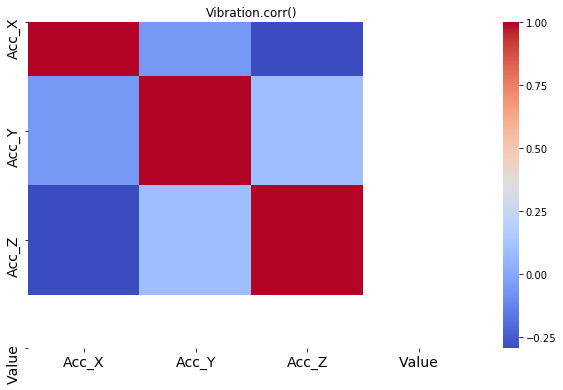

In [22]:
#Codes for the heatmap plot

plt.figure(figsize=(10,6))
sns.heatmap(Vibration.corr(),cmap='coolwarm' )
plt.title('Vibration.corr()')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

The above heatmap shows the how the accelerator sensors  correlate with themselves. Let's check where Acc_Z and Acc_X is correlated. The graph of two sensors is deep blue which means they were both correlated at -0.25. 

This shows that there is a moment that the vibration of both Acc_X and Acc_Z are of the same speed.

In [23]:
Vibration.corr()

,Acc_X,Acc_Y,Acc_Z,Value
Acc_X,1.000000,-0.057341,-0.295689,NaN
Acc_Y,-0.057341,1.000000,0.090320,NaN
Acc_Z,-0.295689,0.090320,1.000000,NaN
Value,NaN,NaN,NaN,NaN


# Data Predicition


Now we are in the most important part of this project.To predict our results using the best fits Machine Learning Algorithms. We separate the dataset into test and training dataset. Here, I make the training datas to be 70% and the test datas to be 30%.

 K Nearest Neighbors Classifier learnt on our training datas and test it on our test datas. The accuracy score was perfect after all.


 

In [24]:
# Spliting our dataset into train and test dataset.
#Recall the above dataset
data3= data

In [25]:
#Let's separate out data into X and y respectively
# For the X variable
X= data3.drop( data3[['Activity', 'Value']], axis=1)

In [26]:
#For the y variable
y= data3['Value']

In [27]:
y


0         1
1         1
2         1
3         1
4         1
         ..
148772    6
148773    6
148774    6
148775    6
148776    6
Name: Value, Length: 148777, dtype: int64

In [28]:
# Splitind into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30)

In [29]:

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_scores= accuracy_score(y_test, predict)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores))
print('\n')
print(confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test,predict))
print(predict)



K Nearest Neighbors Classifier accuracy: 100.0%


[[7248    0    0    0    0    0]
 [   0 7444    0    0    0    0]
 [   0    0 7497    0    0    0]
 [   0    0    0 7621    0    0]
 [   0    0    0    0 7477    0]
 [   0    0    0    0    0 7347]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7248
           2       1.00      1.00      1.00      7444
           3       1.00      1.00      1.00      7497
           4       1.00      1.00      1.00      7621
           5       1.00      1.00      1.00      7477
           6       1.00      1.00      1.00      7347

    accuracy                           1.00     44634
   macro avg       1.00      1.00      1.00     44634
weighted avg       1.00      1.00      1.00     44634

[2 1 5 ... 2 4 3]


# Distplot plots 

In [30]:
predict

array([2, 1, 5, ..., 2, 4, 3], dtype=int64)

In [31]:
type(y_train)

pandas.core.series.Series

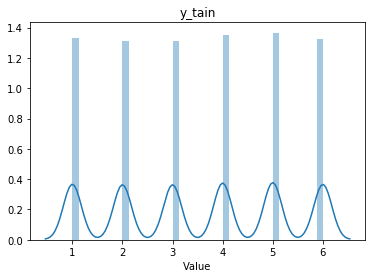

In [32]:
sns.distplot(y_train)
plt.title('y_tain')
plt.show()

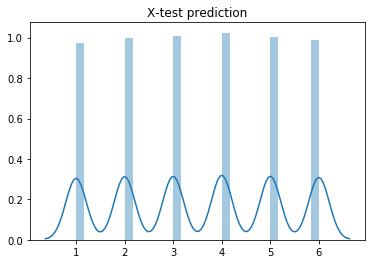

In [33]:
sns.distplot(predict)
plt.title('X-test prediction')
plt.show()

Text(0, 0.5, 'Frequency')

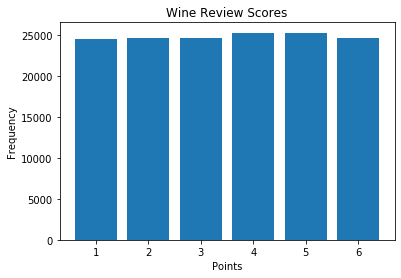

In [34]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = data['Value'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Wine Review Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')